Remaining rows after dropping NaNs in 'status': 48124
Data shape after dropping duplicates: (48124, 32)


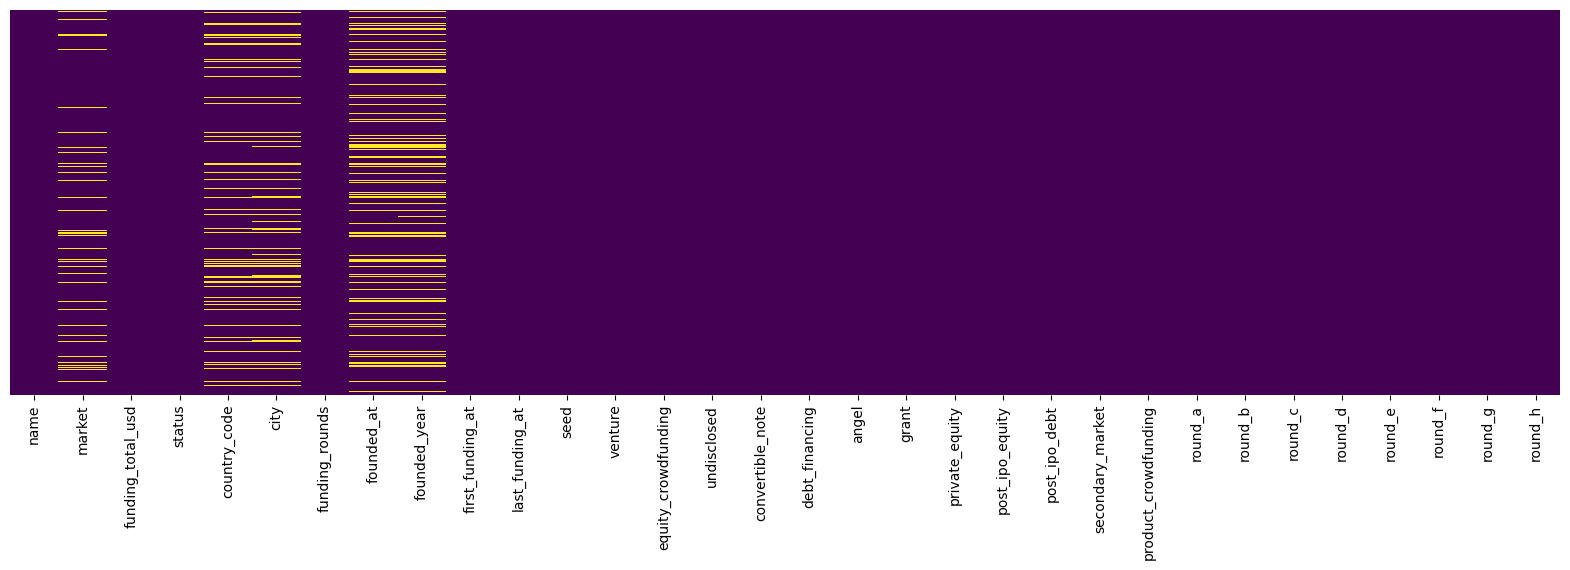

Frequency count of missing values:
0    32760
1     1888
2     9590
3     1721
4     1481
5      681
6        2
7        1
Name: count, dtype: int64


,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,...,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,#waywire,News,1750000.0,acquired,USA,New York,1.0,2012-06-01,2012.0,2012-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,Games,4000000.0,operating,USA,Los Angeles,2.0,NaN,NaN,2010-06-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,Publishing,40000.0,operating,EST,Tallinn,1.0,2012-10-26,2012.0,2012-08-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,Electronics,1500000.0,operating,GBR,London,1.0,2011-04-01,2011.0,2011-04-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,Tourism,60000.0,operating,USA,Fort Worth,2.0,2014-01-01,2014.0,2014-08-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
import pandas as pd
import matplotlib.pyplot as plt  # Correctly import pyplot
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('startup.csv', encoding='latin1')

# Step 2: Clean column names by removing spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 3: Replace '-' with '0' in 'funding_total_usd' column and remove commas, then convert to numeric
df['funding_total_usd'] = df['funding_total_usd'].replace(' -   ', '0')  # Replace dashes with 0
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '', regex=True).astype(float)

# Step 4: Standardize date format for 'founded_at', 'first_funding_at', and 'last_funding_at'
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce').dt.strftime('%Y-%m-%d')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce').dt.strftime('%Y-%m-%d')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce').dt.strftime('%Y-%m-%d')

# Step 5: Drop unnecessary columns
df = df.drop(columns=['permalink', 'homepage_url', 'category_list', 'state_code', 'region', 'founded_month', 'founded_quarter'])

# Step 6: Drop rows where 'status' is NaN
df = df.dropna(subset=['status'])

# Step 7: Display the number of remaining rows after dropping NaNs in 'status'
print(f"Remaining rows after dropping NaNs in 'status': {len(df)}")

# Step 8: Drop duplicate rows
df = df.drop_duplicates()
print(f"Data shape after dropping duplicates: {df.shape}")

# Step 9: Visualize missing values using a heatmap
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

# Step 10: Count the number of missing values in each row
missing_counts = df.isnull().sum(axis=1)

# Step 11: Get the frequency count of missing values
frequency_counts = missing_counts.value_counts().sort_index()

# Step 12: Print the frequency counts for missing values
print("Frequency count of missing values:")
print(frequency_counts)

# Step 13: Save the cleaned dataset
df.to_csv('cleaned_dataset-1.csv', index=False)

# Preview the cleaned dataset
df.head()

In [57]:
missing_counts = df.isnull().sum()
print(missing_counts)

name                        1
market                   3589
funding_total_usd           0
status                      0
country_code             5067
city                     5857
funding_rounds              0
founded_at              10489
founded_year            10560
first_funding_at           10
last_funding_at             6
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_a                     0
round_b                     0
round_c                     0
round_d                     0
round_e                     0
round_f                     0
round_g                     0
round_h                     0
dtype: int64


In [58]:
df = df.dropna(subset=['name', 'market', 'country_code', 'city', 'first_funding_at', 'last_funding_at'])

# Display the number of remaining rows after dropping missing values in the specified columns
print(f"Remaining rows after dropping missing values in specific columns: {len(df)}")

# Preview the cleaned dataset
df.head()

Remaining rows after dropping missing values in specific columns: 39751


,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,...,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,#waywire,News,1750000.0,acquired,USA,New York,1.0,2012-06-01,2012.0,2012-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,Games,4000000.0,operating,USA,Los Angeles,2.0,NaN,NaN,2010-06-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,Publishing,40000.0,operating,EST,Tallinn,1.0,2012-10-26,2012.0,2012-08-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,Electronics,1500000.0,operating,GBR,London,1.0,2011-04-01,2011.0,2011-04-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,Tourism,60000.0,operating,USA,Fort Worth,2.0,2014-01-01,2014.0,2014-08-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df.shape

(39751, 32)

In [60]:
df.columns

Index(['name', 'market', 'funding_total_usd', 'status', 'country_code', 'city',
       'funding_rounds', 'founded_at', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')

In [61]:
# Group by the 'market' column and sort the DataFrame
df_sorted = df.sort_values(by='market').reset_index(drop=True)

# Optionally, if you want to see the sorted DataFrame
print(df_sorted)

                   name     market  funding_total_usd     status country_code  \
0             Hyperfair        3D           2800000.0  operating          USA   
1                mydeco        3D          19679275.0  operating          GBR   
2               CADsurf        3D             40000.0  operating          USA   
3      Surgical Theater        3D            525000.0  operating          USA   
4             Accompani        3D          20600000.0  operating          USA   
...                 ...        ...                ...        ...          ...   
39746           Cope it   mHealth                 0.0  operating          DNK   
39747     BioscanR, INC   mHealth             25000.0  operating          USA   
39748           Pipette   mHealth                 0.0   acquired          USA   
39749    Skin Analytics   mHealth            619328.0  operating          GBR   
39750           Your.MD   mHealth           3300000.0  operating          NOR   

                city  fundi

In [62]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values for each column
print(missing_values)

name                       0
market                     0
funding_total_usd          0
status                     0
country_code               0
city                       0
funding_rounds             0
founded_at              6935
founded_year            6991
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_a                    0
round_b                    0
round_c                    0
round_d                    0
round_e                    0
round_f                    0
round_g                    0
round_h                    0
dtype: int64


In [63]:
# Impute missing values in 'founded_year' with the median
median_founded_year = df['founded_year'].median()
df['founded_year'].fillna(median_founded_year, inplace=True)

# Impute missing values in 'founded_at' with the median date
# First, convert 'founded_at' to datetime format
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')  # Coerce errors to NaT

# Calculate the median date, ignoring NaT
median_founded_at = df['founded_at'].median()
df['founded_at'].fillna(median_founded_at, inplace=True)

In [64]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values for each column
print(missing_values)

name                    0
market                  0
funding_total_usd       0
status                  0
country_code            0
city                    0
funding_rounds          0
founded_at              0
founded_year            0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_a                 0
round_b                 0
round_c                 0
round_d                 0
round_e                 0
round_f                 0
round_g                 0
round_h                 0
dtype: int64


In [65]:
df.head()

,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,...,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,#waywire,News,1750000.0,acquired,USA,New York,1.0,2012-06-01 00:00:00,2012.0,2012-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,Games,4000000.0,operating,USA,Los Angeles,2.0,2009-07-27 12:00:00,2009.0,2010-06-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,Publishing,40000.0,operating,EST,Tallinn,1.0,2012-10-26 00:00:00,2012.0,2012-08-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,Electronics,1500000.0,operating,GBR,London,1.0,2011-04-01 00:00:00,2011.0,2011-04-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,Tourism,60000.0,operating,USA,Fort Worth,2.0,2014-01-01 00:00:00,2014.0,2014-08-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
import pandas as pd

# Load your dataset (replace with your actual data loading code)
# df = pd.read_csv('your_dataset.csv')

# Check the data type of 'founded_at'
print("Data type of 'founded_at':", df['founded_at'].dtype)

# Check for NaN values
print("NaN values in 'founded_at' column:", df['founded_at'].isna().sum())

# If 'founded_at' is not a datetime type, convert it
if not pd.api.types.is_datetime64_any_dtype(df['founded_at']):
    df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')  # This will convert invalid dates to NaT

# Check the data type again
print("Data type of 'founded_at' after conversion:", df['founded_at'].dtype)

# Optionally, ensure 'founded_at' is in date format without time
if pd.api.types.is_datetime64_any_dtype(df['founded_at']):
    df['founded_at'] = df['founded_at'].dt.date

# Convert 'founded_year' to integers
df['founded_year'] = df['founded_year'].astype(int)

# Sort the DataFrame by 'market'
df_sorted = df.sort_values(by='market').reset_index(drop=True)

# Display the sorted DataFrame
df_sorted.head()


Data type of 'founded_at': object
NaN values in 'founded_at' column: 0
Data type of 'founded_at' after conversion: datetime64[ns]


,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,...,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,Hyperfair,3D,2800000.0,operating,USA,San Francisco,2.0,2010-01-01,2010,2012-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mydeco,3D,19679275.0,operating,GBR,London,2.0,2007-02-01,2007,2007-01-01,...,0.0,0.0,14529275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CADsurf,3D,40000.0,operating,USA,Santa Monica,1.0,2012-01-01,2012,2013-06-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Surgical Theater,3D,525000.0,operating,USA,Cleveland,2.0,2010-01-01,2010,2013-04-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Accompani,3D,20600000.0,operating,USA,Los Altos,2.0,2013-01-01,2013,2014-06-16,...,0.0,0.0,5600000.0,15000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df_sorted.head()

,name,market,funding_total_usd,status,country_code,city,funding_rounds,founded_at,founded_year,first_funding_at,...,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,Hyperfair,3D,2800000.0,operating,USA,San Francisco,2.0,2010-01-01,2010,2012-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mydeco,3D,19679275.0,operating,GBR,London,2.0,2007-02-01,2007,2007-01-01,...,0.0,0.0,14529275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CADsurf,3D,40000.0,operating,USA,Santa Monica,1.0,2012-01-01,2012,2013-06-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Surgical Theater,3D,525000.0,operating,USA,Cleveland,2.0,2010-01-01,2010,2013-04-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Accompani,3D,20600000.0,operating,USA,Los Altos,2.0,2013-01-01,2013,2014-06-16,...,0.0,0.0,5600000.0,15000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
import pandas as pd

# Assuming df_sorted is your DataFrame


# Rename the values in the 'status' column
df_sorted['status'] = df_sorted['status'].replace({
    'operating': 'active',
    'acquired': 'active',
    'closed': 'inactive'
})

df_sorted.head()

# Save the df_sorted DataFrame to a CSV file
df_sorted.to_csv('df_sorted.csv', index=False)  




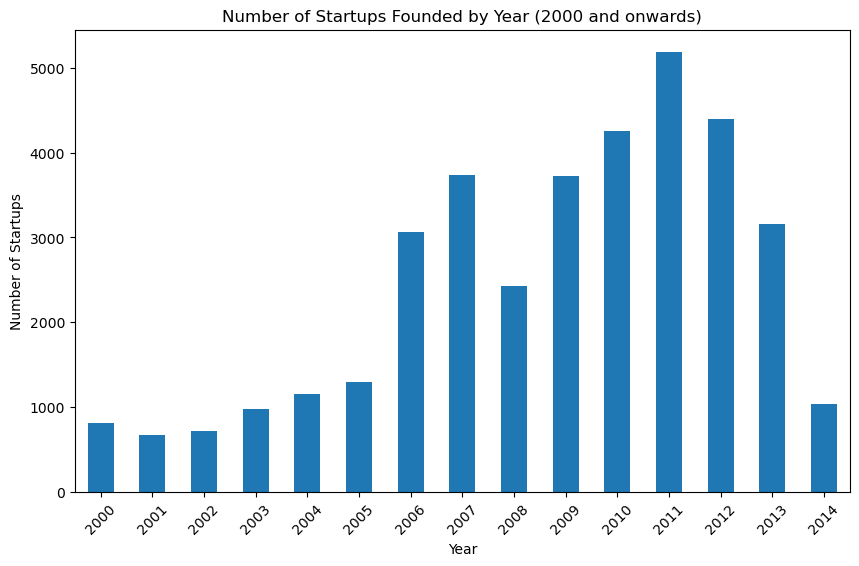

In [38]:
# Drop rows with missing founded_year
df_yearwise = df.dropna(subset=['founded_year'])

# Convert the column to int (in case it's not already)
df_yearwise['founded_year'] = df_yearwise['founded_year'].astype(int)

# Filter startups from the year 2000 onwards
df_yearwise = df_yearwise[df_yearwise['founded_year'] >= 2000]

# Plot year-wise number of startups from 2000 onwards
plt.figure(figsize=(10, 6))
df_yearwise['founded_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Startups Founded by Year (2000 and onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()

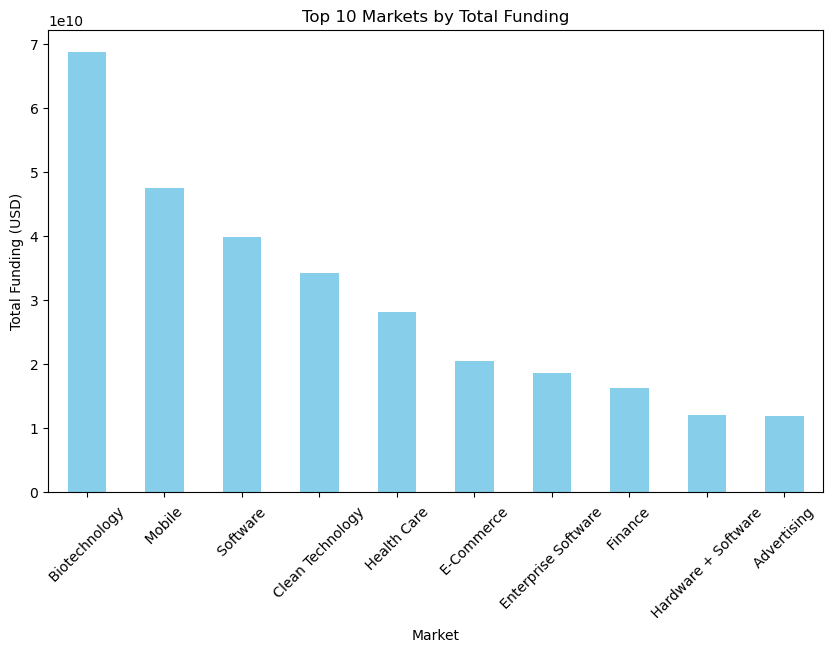

In [40]:
# Convert 'funding_total_usd' to numeric, removing any non-numeric values (if needed)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

# Group by 'market' and sum the total funding in each market
market_funding = df.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False).head(10)

# Plot a bar chart of top 10 markets by total funding
plt.figure(figsize=(10, 6))
market_funding.plot(kind='bar', color='skyblue')
plt.title('Top 10 Markets by Total Funding')
plt.xlabel('Market')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.show()

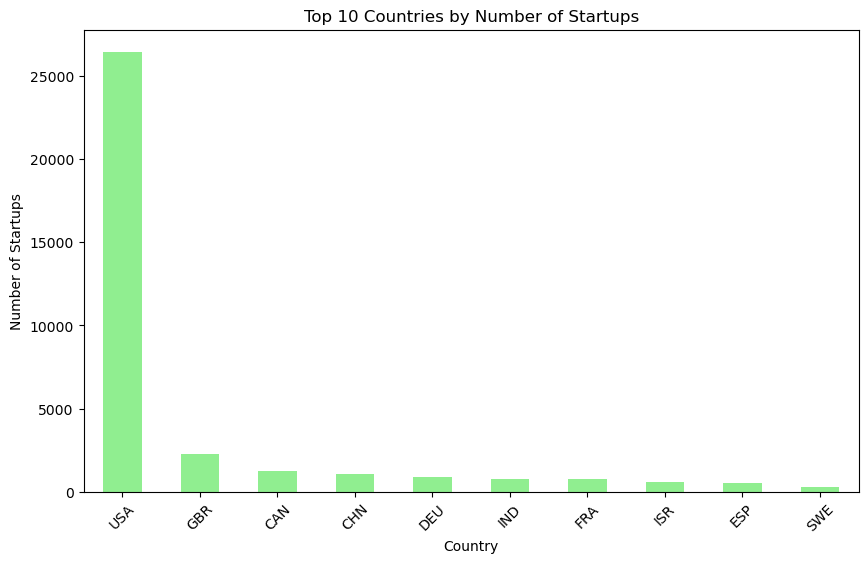

In [49]:
# Group by country and count the number of startups in each country
country_startups = df['country_code'].value_counts().head(10)

# Plot a bar chart for country-wise distribution
plt.figure(figsize=(10, 6))
country_startups.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by Number of Startups')
plt.xlabel('Country')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()


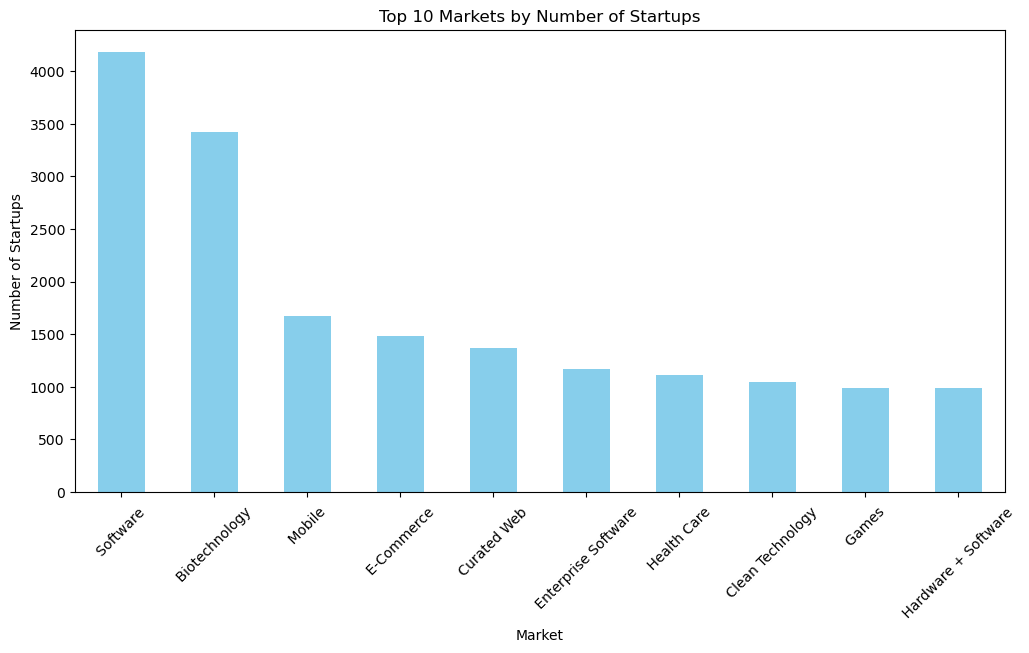

In [47]:
#  Count the number of startups in each market
market_counts = df['market'].value_counts()

# Get the top 10 markets
top_10_markets = market_counts.head(10)

# Plot a bar chart for the number of startups in the top 10 markets
plt.figure(figsize=(12, 6))
top_10_markets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Markets by Number of Startups')
plt.xlabel('Market')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()